In [1]:
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/22FallSync/cs404/spaces/mlComponent
%ls

Mounted at /gdrive
/gdrive/MyDrive/22FallSync/cs404/spaces/mlComponent
classifier.py         motionDectector.ipynb   nb_humanDetector.ipynb
data2/                motionDetector.py       other_nat_images/
humanDetector.py      natural_identifier/     pedestrianDetector.ipynb
humanIdentifier/      natural_identifier_78/  __pycache__/
imageCaptureTimer.py  natural_identifier_80/
imageOut/             natural_images/


In [2]:
# im_width = 256
# im_height = 256
batch_size = 32

# https://www.kaggle.com/datasets/karthika95/pedestrian-detection

training_data = tf.keras.utils.image_dataset_from_directory(
    'natural_images',
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=111,
    # image_size=(im_width, im_height)
    )

val_data = tf.keras.utils.image_dataset_from_directory(
    'natural_images',
    labels='inferred',
    validation_split=0.2,
    subset="validation",
    seed=111,
    # image_size=(im_width, im_height),
    batch_size=batch_size
    )

Found 11173 files belonging to 8 classes.
Using 8939 files for training.
Found 11173 files belonging to 8 classes.
Using 2234 files for validation.


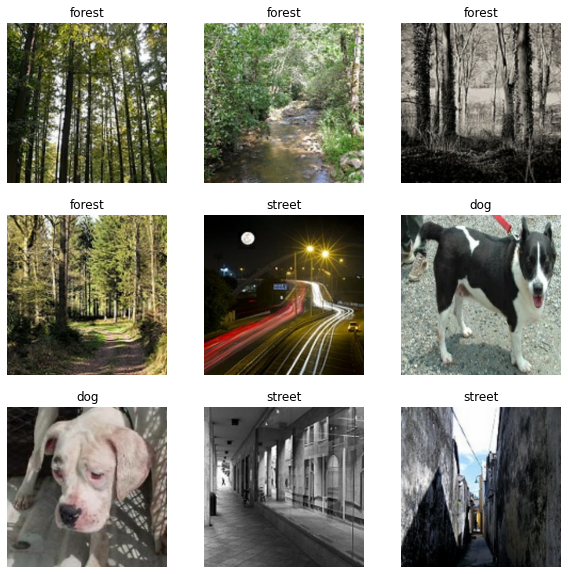

In [3]:
from matplotlib import pyplot as plt

class_names = training_data.class_names

plt.figure(figsize=(10,10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [4]:
for image_batch, labels_batch in training_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = 8

# model = keras.models.Sequential(
#     [
#         keras.layers.Rescaling(1./255),
#         keras.layers.Conv2D(32,3, padding='same', activation='relu'),
#         keras.layers.MaxPooling2D(),
#         keras.layers.Conv2D(64,(3,3), activation='relu'),
#         keras.layers.MaxPooling2D(),
#         # keras.layers.Conv2D(128,(3,3), activation='relu'),
#         # keras.layers.MaxPooling2D((2,2)),
#         keras.layers.Dropout(0.5),
#         keras.layers.Flatten(),
#         # keras.layers.Dense(100, activation='relu'),
#         # keras.layers.Dropout(0.5),
#         keras.layers.Dense(num_classes,activation='softmax'),
#     ]
# )

model = keras.models.Sequential(
    [
        keras.layers.RandomZoom(height_factor=0.2),
        # keras.layers.RandomCrop(256, 256),
        # keras.layers.RandomBrightness(0.1),
        # keras.layers.RandomRotation(0.1),
        keras.layers.RandomFlip(mode="horizontal"),
        keras.layers.Rescaling(1./255),
        keras.layers.Conv2D(32,3, padding='same', activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.1),
        keras.layers.Conv2D(64,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.1),
        keras.layers.Conv2D(128,(3,3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes,activation='softmax'),
    ]
)

# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']
# )

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',  patience=8, verbose=2)

model.fit(
  training_data,
  validation_data=val_data,
  epochs=50,
  # batch_size=256,
  # epochs=50,
  verbose=2,
  # validation_split=0.125,
  callbacks=[es]
)

Epoch 1/50


In [ ]:
# model.save('humanDetector') # 0.7174
# model.save('humanOrDogIdentifier') # 0.6739ish?
model.save('natural_identifier_withNegatives')